In [1]:
import os
import numpy as np,  pandas as pd
import matplotlib.pyplot as plt
import zipfile


In [3]:
train_df = pd.read_csv('pre_processed.csv')
train_df.shape

(2064924, 17)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064924 entries, 0 to 2064923
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    float64
 8   abs_long           float64
 9   abs_lat            float64
 10  euleraian          float64
 11  manhattan          float64
 12  geodesic           float64
 13  log_euler          float64
 14  log_man            float64
 15  log_geo            float64
 16  log_pass           float64
dtypes: float64(15), object(2)
memory usage: 267.8+ MB


In [4]:
train_df = train_df.drop(
    ['abs_long', 'abs_lat', 'euleraian', 'manhattan', 'geodesic', 'log_euler', 'log_man', 'log_geo', 'log_pass'],
    axis=1
)

# train_df = train_df.drop(['fare_amount'], axis=1)
train_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...,...
2064919,2012-02-24 07:56:00.000000168,9.7,2012-02-24 07:56:00 UTC,-73.956757,40.767067,-73.977388,40.747427,1.0
2064920,2012-09-12 17:44:00.000000149,8.5,2012-09-12 17:44:00 UTC,-73.977695,40.773727,-73.965335,40.774755,2.0
2064921,2009-11-21 22:18:00.000000202,18.1,2009-11-21 22:18:00 UTC,-73.987000,40.761277,-73.938247,40.848572,1.0
2064922,2012-11-30 09:55:00.00000071,9.0,2012-11-30 09:55:00 UTC,-73.961837,40.766538,-73.975292,40.761947,1.0


In [5]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)
train_df.shape

(1651939, 8)

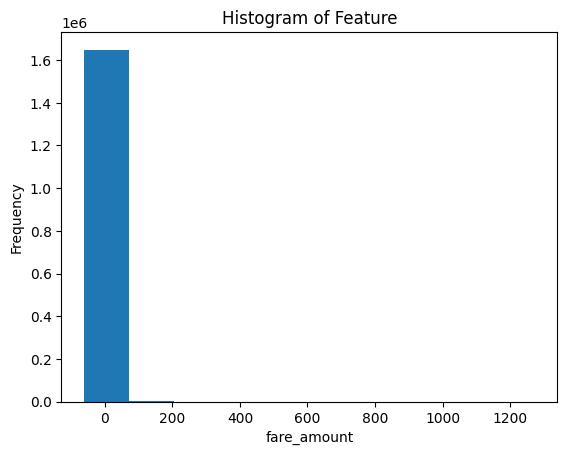

In [6]:
plt.hist(train_df['fare_amount'], bins=10)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('fare_amount')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')

# Display the histogram
plt.show()


In [6]:
train_df = train_df[train_df['fare_amount'] <= 50][train_df['fare_amount'] > 0]

/tmp/ipykernel_4358/635733674.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df = train_df[train_df['fare_amount'] <= 50][train_df['fare_amount'] > 0]


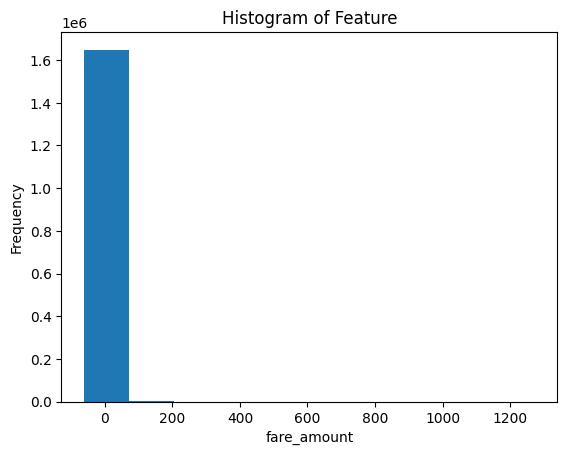

In [6]:
plt.hist(train_df['fare_amount'], bins=10)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('fare_amount')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')

# Display the histogram
plt.show()


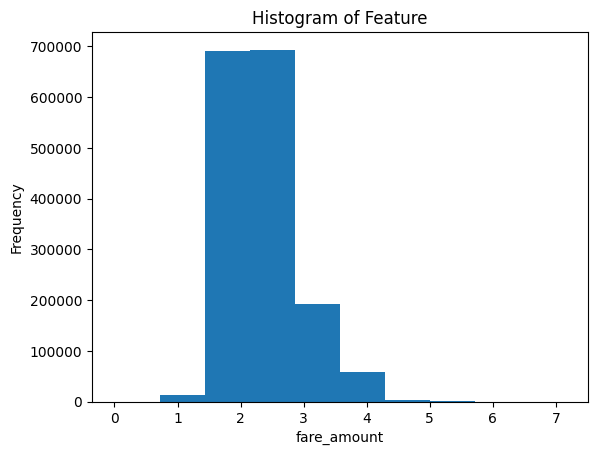

In [7]:
plt.hist(train_df['fare_amount'].apply(lambda x: np.log(x+1)), bins=10)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('fare_amount')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')

# Display the histogram
plt.show()


In [9]:
train_df["log_fare_amount"] = train_df['fare_amount'].apply(lambda x: np.log(x+1))


In [14]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df['time'] = pd.to_numeric(train_df['pickup_datetime'].dt.tz_localize(None).astype('datetime64[ns]').values, downcast='float')

In [15]:
train_df['geo_time'] = train_df['log_geo'] * train_df['time']

In [10]:
train_df.select_dtypes(include="float").corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_fare_amount
fare_amount,1.000000,0.006992,-0.006263,0.007892,-0.004453,0.012573,0.901002
pickup_longitude,0.006992,1.000000,-0.397605,0.714349,-0.299491,-0.000682,0.001512
pickup_latitude,-0.006263,-0.397605,1.000000,-0.442074,0.455673,-0.000315,-0.001393
dropoff_longitude,0.007892,0.714349,-0.442074,1.000000,-0.345513,-0.000392,0.000344
dropoff_latitude,-0.004453,-0.299491,0.455673,-0.345513,1.000000,-0.000178,0.000423
passenger_count,0.012573,-0.000682,-0.000315,-0.000392,-0.000178,1.000000,0.017418
log_fare_amount,0.901002,0.001512,-0.001393,0.000344,0.000423,0.017418,1.000000


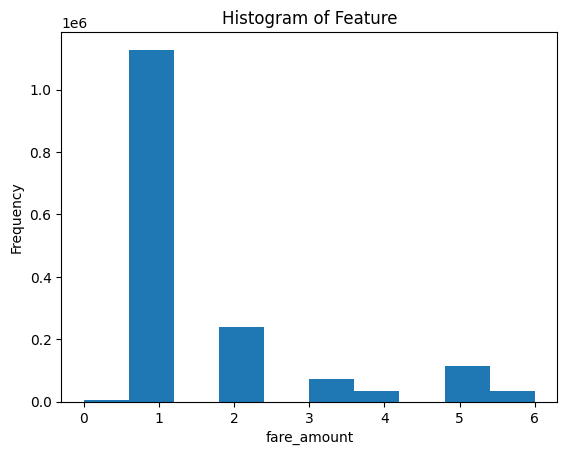

In [11]:
plt.hist(train_df['passenger_count'][train_df['passenger_count'] < 10], bins=10)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('fare_amount')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')

# Display the histogram
plt.show()

In [8]:
train_df = train_df[train_df['passenger_count'] > 0]

In [9]:
from collections import Counter
print(sorted(list((Counter(train_df['fare_amount'][train_df['fare_amount'] < 51][train_df['fare_amount'] > 35])).items()), key = lambda x:x[1], reverse = True)[:100])
# plt.show()

[(49.8, 5018), (45.0, 4452), (49.57, 3191), (49.15, 970), (36.5, 642), (35.3, 519), (38.5, 511), (36.33, 510), (35.5, 503), (36.0, 492), (36.83, 490), (35.33, 485), (50.0, 460), (50.5, 459), (35.83, 458), (37.83, 457), (37.33, 450), (38.33, 420), (38.83, 394), (40.5, 389), (37.5, 388), (37.0, 377), (39.83, 376), (38.0, 364), (36.1, 333), (37.3, 330), (40.0, 328), (35.7, 324), (42.5, 324), (39.33, 321), (40.33, 311), (39.0, 307), (40.83, 274), (39.3, 274), (41.0, 274), (39.5, 273), (41.33, 271), (36.9, 262), (41.83, 249), (37.7, 248), (42.33, 243), (44.5, 243), (41.5, 236), (42.0, 234), (42.83, 218), (43.33, 217), (43.0, 209), (43.83, 195), (38.9, 194), (38.1, 194), (43.5, 192), (46.5, 189), (41.3, 188), (39.7, 184), (44.0, 178), (44.83, 170), (44.33, 168), (45.33, 160), (46.33, 150), (43.3, 148), (45.5, 147), (48.0, 146), (48.5, 144), (41.7, 141), (45.83, 140), (46.0, 129), (40.1, 127), (42.1, 127), (40.9, 125), (47.0, 122), (37.8, 120), (47.5, 119), (46.83, 119), (35.07, 115), (49.5, 

In [10]:
train_df = train_df[~(train_df['fare_amount'] == 49.8)]
train_df = train_df[~(train_df['fare_amount'] == 45.0)]
train_df = train_df[~(train_df['fare_amount'] == 49.57)]

In [21]:
train_df = train_df.drop(['key', 'pickup_datetime', 'dropoff_longitude', 'dropoff_latitude', 'manhattan', 'euleraian',	'geodesic',	'log_euler',	'log_man', 'log_pass'] , axis = 1)
train_df = train_df[~(train_df['log_geo'] == float('-inf'))]
train_df = train_df[~(train_df['log_fare_amount'] == float('-inf'))]

In [10]:
fare_amount = train_df['log_fare_amount']
train_df = train_df.drop(['log_fare_amount', 'fare_amount'],axis=1)


In [13]:
from sklearn.base import TransformerMixin, BaseEstimator
class DistanceCalculator(BaseEstimator, TransformerMixin):
    
    def __init__(self, type = "euclidean"):
        self.type=type
        
    
    def fit(self, X, y=None):
      
        return self

    def transform(self, X):
        alat, along, blat, blong = X.T

        if self.type == "euclidean":
            transformed_data = np.sqrt((blat - alat) ** 2 + (blong - along) ** 2)
        elif self.type == "manhattan":
            transformed_data = np.abs(blat - alat) + np.abs(blong - along)
        elif self.type == "geodesic":
            lat1, lon1, lat2, lon2 = np.radians(X.T)
            dlon = lon2 - lon1
            dlat = lat2 - lat1
            a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
            c = 2 * np.arcsin(np.sqrt(a))
            r = 6371  # Earth's radius in kilometers
            transformed_data = c * r + 1

        return transformed_data.reshape(-1,1)
    
    def get_feature_names_out(self, input_features=None):
            if self.type == "euclidean":
                return ["euclidean_distance"]
            elif self.type == "manhattan":
                return ["manhattan_distance"]
            elif self.type == "geodesic":
                return ["geodesic_distance"]
        

from datetime import datetime

def datetime_to_float(date_array):
	secs = []
	for date_str in  date_array:
		dt = datetime.strptime(date_str[0], "%Y-%m-%d %H:%M:%S %Z")
		epoch = datetime.utcfromtimestamp(0)  # Reference datetime (Unix epoch)
		delta = dt - epoch
		seconds = delta.total_seconds()
		secs.append(seconds)
	return np.array(secs).reshape(-1,1)

In [14]:
#define some pipelines
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

time_transformer = FunctionTransformer(datetime_to_float, feature_names_out=lambda *input_features:["time"])

time_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    time_transformer,
    # StandardScaler()

)

def default_num_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        # StandardScaler()
    )
def replace_inf_with_N(X):
    return np.where(X == float('-inf'), -10**19, X)

def log_pipline(name):
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(func=np.log, inverse_func=np.exp, feature_names_out= lambda *x: name),
        # SimpleImputer(strategy='constant', fill_value=float('-inf')),
        # FunctionTransformer(replace_inf_with_N, feature_names_out=lambda *x:name)
        # StandardScaler()

    )
def abs_diff_pipeline(name = None):

    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(lambda x : np.hstack((x, np.abs(x[:, [0]] - x[:, [1]]))), feature_names_out= lambda *x: name),
        # StandardScaler()
    )

dist_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    DistanceCalculator(type="geodesic"),
    # FunctionTransformer(np.log, feature_names_out= lambda *x: ['geodesic_distance']),
    # StandardScaler()
)

In [15]:
def shifter(name):
        return make_pipeline(
                SimpleImputer(strategy="median"),
                FunctionTransformer(lambda r:r+1, feature_names_out= lambda *r:name)
        )

In [16]:
# define first preprocessor
from sklearn.compose import ColumnTransformer, make_column_selector
preprocessing1 = ColumnTransformer([
    ("diff_long", abs_diff_pipeline(["long1","long2","abs_long"]), ["pickup_longitude","dropoff_longitude"]),
    ("diff_lat", abs_diff_pipeline(["lat1","lat2","abs_lat"]), ["pickup_latitude", "dropoff_latitude"]),
    ("dist", dist_pipeline, ["pickup_latitude","pickup_longitude", "dropoff_latitude", "dropoff_longitude"]),
    ("time_pipeline", time_pipeline, ['pickup_datetime']),
    ("pass", default_num_pipeline(), ['passenger_count']),
], remainder="drop")  



In [52]:
taxi_data_prepared = preprocessing1.fit_transform(train_df)
preprocessing1.get_feature_names_out()

array(['diff_long__long1', 'diff_long__long2', 'diff_long__abs_long',
       'diff_lat__lat1', 'diff_lat__lat2', 'diff_lat__abs_lat',
       'dist__geodesic_distance', 'time_pipeline__time',
       'pass__passenger_count'], dtype=object)

In [154]:
# ("shift", shifter(["log_geodesic_distance", "log_passenger"]), ["geodesic_distance","passenger_count"])

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [54]:
temp = pd.merge(pd.DataFrame(taxi_data_prepared, columns=map(lambda x:x.split('__')[-1], preprocessing1.get_feature_names_out()), index= train_df.index), fare_amount, left_index=True, right_index=True)
# temp['log'] = temp['geodesic_distance'].apply(np.log)



In [55]:

# temp = temp[temp['geodesic_distance'] != 0]
temp.corr()

,long1,long2,abs_long,lat1,lat2,abs_lat,geodesic_distance,time,passenger_count,log_fare_amount
long1,1.000000,0.715142,0.059237,-0.389398,-0.264739,0.135397,0.119512,0.004631,-0.000486,-0.003496
long2,0.715142,1.000000,-0.083954,-0.434181,-0.333974,-0.084925,0.095632,0.005882,-0.000030,-0.006241
abs_long,0.059237,-0.083954,1.000000,-0.059594,-0.079119,0.574306,0.382997,0.006497,-0.000783,-0.000601
lat1,-0.389398,-0.434181,-0.059594,1.000000,0.456090,-0.045923,-0.098583,-0.005955,-0.000509,0.003220
lat2,-0.264739,-0.333974,-0.079119,0.456090,1.000000,-0.200844,-0.059355,-0.005509,-0.000260,0.004593
abs_lat,0.135397,-0.084925,0.574306,-0.045923,-0.200844,1.000000,0.231619,0.003355,-0.001642,0.001274
geodesic_distance,0.119512,0.095632,0.382997,-0.098583,-0.059355,0.231619,1.000000,0.023699,-0.000996,0.000672
time,0.004631,0.005882,0.006497,-0.005955,-0.005509,0.003355,0.023699,1.000000,0.006200,0.145045
passenger_count,-0.000486,-0.000030,-0.000783,-0.000509,-0.000260,-0.001642,-0.000996,0.006200,1.000000,0.017091
log_fare_amount,-0.003496,-0.006241,-0.000601,0.003220,0.004593,0.001274,0.000672,0.145045,0.017091,1.000000


In [56]:
# taxi_data_prepared = pd.DataFrame(taxi_data_prepared, columns=map(lambda x:x.split('__')[-1], preprocessing1.get_feature_names_out()), index= train_df.index)
taxi_data_prepared =  temp.copy()
taxi_data_prepared.corr()

,long1,long2,abs_long,lat1,lat2,abs_lat,geodesic_distance,time,passenger_count,log_fare_amount
long1,1.000000,0.715142,0.059237,-0.389398,-0.264739,0.135397,0.119512,0.004631,-0.000486,-0.003496
long2,0.715142,1.000000,-0.083954,-0.434181,-0.333974,-0.084925,0.095632,0.005882,-0.000030,-0.006241
abs_long,0.059237,-0.083954,1.000000,-0.059594,-0.079119,0.574306,0.382997,0.006497,-0.000783,-0.000601
lat1,-0.389398,-0.434181,-0.059594,1.000000,0.456090,-0.045923,-0.098583,-0.005955,-0.000509,0.003220
lat2,-0.264739,-0.333974,-0.079119,0.456090,1.000000,-0.200844,-0.059355,-0.005509,-0.000260,0.004593
abs_lat,0.135397,-0.084925,0.574306,-0.045923,-0.200844,1.000000,0.231619,0.003355,-0.001642,0.001274
geodesic_distance,0.119512,0.095632,0.382997,-0.098583,-0.059355,0.231619,1.000000,0.023699,-0.000996,0.000672
time,0.004631,0.005882,0.006497,-0.005955,-0.005509,0.003355,0.023699,1.000000,0.006200,0.145045
passenger_count,-0.000486,-0.000030,-0.000783,-0.000509,-0.000260,-0.001642,-0.000996,0.006200,1.000000,0.017091
log_fare_amount,-0.003496,-0.006241,-0.000601,0.003220,0.004593,0.001274,0.000672,0.145045,0.017091,1.000000


In [57]:
fare_amount = taxi_data_prepared['log_fare_amount']
taxi_data_prepared = taxi_data_prepared.drop(['log_fare_amount'],axis=1)

In [58]:
taxi_data_prepared.columns

Index(['long1', 'long2', 'abs_long', 'lat1', 'lat2', 'abs_lat',
       'geodesic_distance', 'time', 'passenger_count'],
      dtype='object')

In [17]:
from sklearn.compose import ColumnTransformer, make_column_selector
intra_preprocessing = ColumnTransformer([
    ("shift", shifter(["geodesic_distance", "passenger_count"]), [6,8])
], remainder="passthrough") 

In [79]:
mid_data = intra_preprocessing.fit_transform(taxi_data_prepared)
temp2 = pd.merge(pd.DataFrame(mid_data, columns=map(lambda x:x.split('__')[-1], intra_preprocessing.get_feature_names_out()), index= train_df.index), fare_amount, left_index=True, right_index=True)


In [81]:
temp2.describe()

,geodesic_distance,passenger_count,long1,long2,abs_long,lat1,lat2,abs_lat,time,log_fare_amount
count,1.617788e+06,1.617788e+06,1.617788e+06,1.617788e+06,1.617788e+06,1.617788e+06,1.617788e+06,1.617788e+06,1.617788e+06,1.617788e+06
mean,1.877851e+01,2.683002e+00,-7.254341e+01,-7.255080e+01,1.798399e-01,3.993842e+01,3.993872e+01,1.186993e-01,1.332003e+09,2.176919e+00
std,3.501867e+02,1.306914e+00,1.323171e+01,1.275851e+01,9.816780e+00,8.493186e+00,1.041940e+01,9.998078e+00,5.835048e+07,5.475151e-01
min,1.000000e+00,1.000000e+00,-3.377681e+03,-3.383297e+03,0.000000e+00,-3.458665e+03,-3.461541e+03,0.000000e+00,1.230768e+09,-4.605170e+00
25%,2.204742e+00,2.000000e+00,-7.399218e+01,-7.399142e+01,5.743000e-03,4.073566e+01,4.073459e+01,6.520000e-03,1.281888e+09,1.791759e+00
50%,3.081122e+00,2.000000e+00,-7.398197e+01,-7.398028e+01,1.220800e-02,4.075296e+01,4.075344e+01,1.360600e-02,1.331839e+09,2.091864e+00
75%,4.733008e+00,3.000000e+00,-7.396778e+01,-7.396421e+01,2.284900e-02,4.076733e+01,4.076824e+01,2.599200e-02,1.381775e+09,2.493205e+00
max,1.707551e+04,7.000000e+00,2.856442e+03,3.414307e+03,5.448388e+03,2.621628e+03,3.320687e+03,5.486099e+03,1.435709e+09,3.912023e+00


In [82]:
taxi_mid_data = temp2.drop(['log_fare_amount'], axis=1)

In [18]:
def num_pipeline():
        return make_pipeline(
        SimpleImputer(strategy="median"),
        StandardScaler()
        )




In [84]:
taxi_mid_data.columns

Index(['geodesic_distance', 'passenger_count', 'long1', 'long2', 'abs_long',
       'lat1', 'lat2', 'abs_lat', 'time'],
      dtype='object')

In [19]:
from sklearn.compose import make_column_selector
preprocessing2 = ColumnTransformer([
    ("log", log_pipline(["log_geodesic_distance", "log_passenger"]), [0,1]),
    ("default", num_pipeline(), list(range(9)))
], remainder="passthrough")


In [101]:
taxi_data_prepared2 = preprocessing2.fit_transform(taxi_mid_data)
# preprocessing2.get_feature_names_out()


In [88]:
taxi_data_prepared2 = pd.DataFrame(taxi_data_prepared2, columns=map(lambda x:x.split('__')[-1], preprocessing2.get_feature_names_out()), index = taxi_data_prepared.index)
taxi_data_prepared2 = pd.merge(taxi_data_prepared2, fare_amount, right_index=True, left_index=True)


In [89]:
# taxi_data_prepared2 = pd.DataFrame(taxi_data_prepared2, columns=map(lambda x:x.split('__')[-1], preprocessing2.get_feature_names_out()), index = train_df.index)
# taxi_data_prepared2 = taxi_data_prepared2.dropna()
# pd.DataFrame(taxi_data_prepared2, columns= preprocessing2.get_feature_names_out())
taxi_data_prepared2.corr()

,log_geodesic_distance,log_passenger,geodesic_distance,passenger_count,long1,long2,abs_long,lat1,lat2,abs_lat,time,log_fare_amount
log_geodesic_distance,1.000000,0.007350,0.496363,0.005420,-0.121545,-0.134816,0.189992,0.107924,0.089574,0.114587,0.020365,0.698976
log_passenger,0.007350,1.000000,-0.001863,0.985738,-0.000856,-0.000558,-0.001208,-0.000142,0.000152,-0.001924,-0.001367,0.020414
geodesic_distance,0.496363,-0.001863,1.000000,-0.000996,0.119512,0.095632,0.382997,-0.098583,-0.059355,0.231619,0.023699,0.000672
passenger_count,0.005420,0.985738,-0.000996,1.000000,-0.000486,-0.000030,-0.000783,-0.000509,-0.000260,-0.001642,0.006200,0.017091
long1,-0.121545,-0.000856,0.119512,-0.000486,1.000000,0.715142,0.059237,-0.389398,-0.264739,0.135397,0.004631,-0.003496
long2,-0.134816,-0.000558,0.095632,-0.000030,0.715142,1.000000,-0.083954,-0.434181,-0.333974,-0.084925,0.005882,-0.006241
abs_long,0.189992,-0.001208,0.382997,-0.000783,0.059237,-0.083954,1.000000,-0.059594,-0.079119,0.574306,0.006497,-0.000601
lat1,0.107924,-0.000142,-0.098583,-0.000509,-0.389398,-0.434181,-0.059594,1.000000,0.456090,-0.045923,-0.005955,0.003220
lat2,0.089574,0.000152,-0.059355,-0.000260,-0.264739,-0.333974,-0.079119,0.456090,1.000000,-0.200844,-0.005509,0.004593
abs_lat,0.114587,-0.001924,0.231619,-0.001642,0.135397,-0.084925,0.574306,-0.045923,-0.200844,1.000000,0.003355,0.001274


In [91]:
taxi_data_prepared2.corr()
fare_amount = taxi_data_prepared2['log_fare_amount']
taxi_data_prepared2 = taxi_data_prepared2.drop(['log_fare_amount'], axis=1)

In [23]:
train_df_features = train_df.dropna().drop(['log_fare_amount', 'fare_amount'],axis = 1)
train_df_label = train_df.dropna()['log_fare_amount']

In [25]:
train_df_features

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
84912,2013-01-22 01:06:00.00000025,2013-01-22 01:06:00 UTC,-73.981725,40.740897,-73.976342,40.748195,1.0
1555923,2013-12-09 21:13:00.000000213,2013-12-09 21:13:00 UTC,-74.005950,40.735842,-73.990947,40.736672,5.0
1620310,2013-06-08 23:08:04.0000003,2013-06-08 23:08:04 UTC,-74.000599,40.729951,-73.971380,40.762730,1.0
1255623,2013-10-19 19:40:00.000000234,2013-10-19 19:40:00 UTC,-73.974565,40.761355,-73.983677,40.763637,3.0
1365856,2012-04-08 12:32:00.00000064,2012-04-08 12:32:00 UTC,-73.977862,40.742002,-73.979705,40.739520,1.0
...,...,...,...,...,...,...,...
259178,2014-10-11 12:20:17.0000001,2014-10-11 12:20:17 UTC,-73.973488,40.762853,-73.972851,40.780378,2.0
1414414,2012-04-04 18:36:20.0000005,2012-04-04 18:36:20 UTC,-73.999243,40.724985,-73.985819,40.758576,3.0
131932,2009-03-16 21:02:58.0000005,2009-03-16 21:02:58 UTC,-73.981534,40.741339,-73.993296,40.741475,1.0
671155,2011-12-01 16:52:20.0000001,2011-12-01 16:52:20 UTC,-73.998987,40.734244,-74.006894,40.738168,1.0


In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing1, intra_preprocessing, preprocessing2, LinearRegression())
lin_reg.fit(train_df_features, train_df_label)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(transformers=[('diff_long',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function abs_diff_pipeline.<locals>.<lambda> at 0x7fb41cf55870>,
                                                                                       func=<function abs_diff_pipeline.<locals>.<lambda> at 0x7fb4221829e0>))]),
                                                  ['pic...
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function log_pipline.<locals>.<lambda> at 0x7fb41cf575b0>,
                                                                                       func=<ufunc 'log'>,
                                                                                       inverse_func=<ufunc 'exp'>))]),
                                                  [0, 1]),
                                                 ('default',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('linearregression', LinearRegression())])

In [20]:
test_df_label = test_df['fare_amount']
test_df_features = test_df.drop(['fare_amount'], axis=1)
test_df_label

1254459     6.50
1374488     6.10
1261919    14.90
1647582     5.50
1498042     4.10
           ...  
1219179    12.50
160270     57.33
1081893     7.30
1847577     6.00
2064078    12.90
Name: fare_amount, Length: 412985, dtype: float64

In [29]:
y_pred = lin_reg.predict(test_df_features)


In [30]:
from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_true, pd.DataFrame(y_pred).apply(np.exp).to_numpy())
# print("Mean Squared Error:", mse)

lin_rmse = mean_squared_error(test_df_label, pd.DataFrame(y_pred).apply(lambda x: np.exp(x)-1).to_numpy(), squared=False)
lin_rmse



7.08829900752228

In [136]:
pd.DataFrame(y_pred).apply(np.exp).to_numpy()


array([[ 6.8101189 ],
       [ 6.4161277 ],
       [15.95441508],
       ...,
       [ 4.61446949],
       [ 4.74359104],
       [12.16540237]])

In [21]:
train_df_without_log = train_df.copy()
wl_train_df_features = train_df_without_log.dropna().drop(['fare_amount'],axis = 1)
wl_train_df_label = train_df_without_log.dropna()['fare_amount']


In [32]:
lin_reg_without_log = make_pipeline(preprocessing1, intra_preprocessing, preprocessing2, LinearRegression())
lin_reg_without_log.fit(wl_train_df_features, wl_train_df_label)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(transformers=[('diff_long',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function abs_diff_pipeline.<locals>.<lambda> at 0x7fb41cf55870>,
                                                                                       func=<function abs_diff_pipeline.<locals>.<lambda> at 0x7fb4221829e0>))]),
                                                  ['pic...
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function log_pipline.<locals>.<lambda> at 0x7fb41cf575b0>,
                                                                                       func=<ufunc 'log'>,
                                                                                       inverse_func=<ufunc 'exp'>))]),
                                                  [0, 1]),
                                                 ('default',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('linearregression', LinearRegression())])

In [33]:
y_pred_without_log = lin_reg_without_log.predict(test_df_features)


In [34]:
lin_rmse_without_log = mean_squared_error(test_df_label, y_pred_without_log, squared=False)
lin_rmse_without_log


6.329558415745409

In [22]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing1, intra_preprocessing, preprocessing2, DecisionTreeRegressor(random_state=42))
tree_reg.fit(wl_train_df_features, wl_train_df_label)

KeyboardInterrupt: 

In [36]:
tree_pred = tree_reg.predict(wl_train_df_features)
tree_rmse = mean_squared_error(tree_pred, wl_train_df_label ,squared=False)

In [38]:
tree_pred_test = tree_reg.predict(test_df_features)
tree_rmse_test = mean_squared_error(tree_pred_test, test_df_label ,squared=False)

In [39]:
tree_rmse

0.05009370887007395

In [40]:
tree_rmse_test

6.0338618508185915

In [42]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, wl_train_df_features, wl_train_df_label, scoring="neg_root_mean_squared_error", cv=10)

In [43]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      5.844685
std       0.292502
min       5.656532
25%       5.683698
50%       5.740935
75%       5.817104
max       6.607987
dtype: float64

In [44]:
test_pred = tree_reg.predict(test_df_features)


In [47]:
tree_rmse_test_cross = mean_squared_error(test_pred, test_df_label ,squared=False)
tree_rmse_test_cross
# pd.DataFrame(np.exp(test_pred))

6.0338618508185915

In [51]:
# train_df_label

84912      1.386294
1555923    1.791759
1620310    2.708050
1255623    2.079442
1365856    1.064711
             ...   
259178     2.197225
1414414    2.557227
131932     1.686399
671155     1.589235
121958     2.091864
Name: fare_amount, Length: 1617778, dtype: float64

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg = make_pipeline(preprocessing1, intra_preprocessing, preprocessing2,  RandomForestRegressor(random_state=42, n_jobs=-1))
forest_rmses = -cross_val_score(forest_reg, wl_train_df_features, wl_train_df_label, scoring="neg_root_mean_squared_error", cv=10)

: 

: 